            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Linear Regression R2 Score: 0.6690412331929895
Polynomial Regression R2 Score: 0.9973922891706614


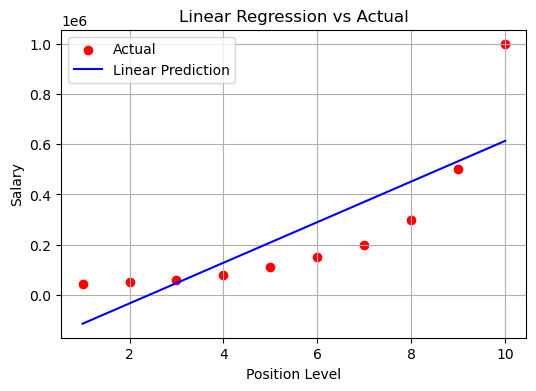

C:\Users\WeHouse 20\AppData\Local\Temp\ipykernel_4212\3264460820.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)  # For smooth curve


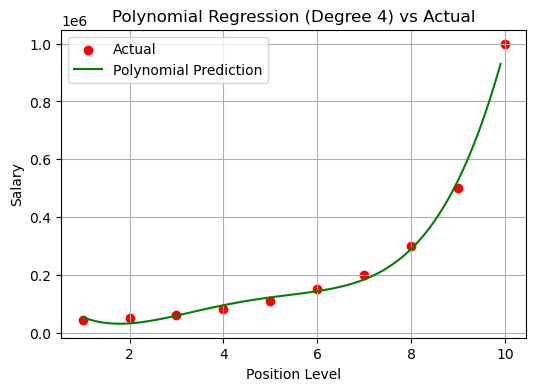

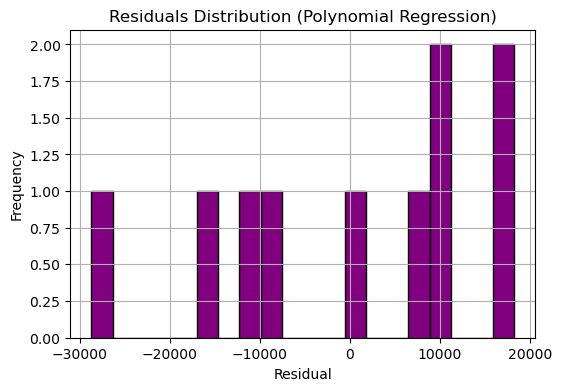

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
poly_df = pd.read_csv('D:/TM/Assignment done by me/Mar/29-03-2025/Polynomial Assignment/Position_Salaries.csv')
print(poly_df.head())

# Step 3: Extract features and target
X = poly_df[['Level']].values
y = poly_df['Salary'].values

# Step 4: Linear Regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Step 5: Polynomial Regression (degree=4 for smooth curve)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Step 6: Predictions
y_pred_linear = lin_reg.predict(X)
y_pred_poly = poly_reg.predict(X_poly)

# Step 7: Evaluation
print("\nLinear Regression R2 Score:", r2_score(y, y_pred_linear))
print("Polynomial Regression R2 Score:", r2_score(y, y_pred_poly))

# Step 8: Visualization - Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X, y_pred_linear, color='blue', label='Linear Prediction')
plt.title('Linear Regression vs Actual')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Visualization - Polynomial Regression
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)  # For smooth curve
X_grid_poly = poly_features.transform(X_grid)
y_grid_pred = poly_reg.predict(X_grid_poly)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X_grid, y_grid_pred, color='green', label='Polynomial Prediction')
plt.title('Polynomial Regression (Degree 4) vs Actual')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Residual Plot
residuals = y - y_pred_poly
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title('Residuals Distribution (Polynomial Regression)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
